In [1]:
# Multi Layer Perceptron with Chi Square Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\chisq_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,count_floors_pre_eq,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use_hotel,has_secondary_use_rental,damage_grade
175399,3,x,v,0,0,0,0,1,0,0,1
243973,2,n,v,0,0,1,0,0,0,0,1
167263,1,n,f,0,0,0,0,0,0,0,1
197015,2,q,f,0,0,0,0,0,0,0,1
68832,2,n,f,0,1,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])

In [11]:
train_data.head()

,count_floors_pre_eq,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use_hotel,has_secondary_use_rental,damage_grade
175399,3,2,2,0,0,0,0,1,0,0,1
243973,2,0,2,0,0,1,0,0,0,0,1
167263,1,0,0,0,0,0,0,0,0,0,1
197015,2,1,0,0,0,0,0,0,0,0,1
68832,2,0,0,0,1,0,0,0,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,10].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1885/1885 [==============================] - 4s 2ms/step - loss: 0.9260 - accuracy: 0.5293 - val_loss: 0.9104 - val_accuracy: 0.5368
Epoch 2/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.9041 - accuracy: 0.5356 - val_loss: 0.9024 - val_accuracy: 0.5350
Epoch 3/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.9016 - accuracy: 0.5370 - val_loss: 0.8992 - val_accuracy: 0.5349
Epoch 4/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8998 - accuracy: 0.5408 - val_loss: 0.8995 - val_accuracy: 0.5368
Epoch 5/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8990 - accuracy: 0.5425 - val_loss: 0.8989 - val_accuracy: 0.5367
Epoch 6/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8981 - accuracy: 0.5409 - val_loss: 0.8986 - val_accuracy: 0.5380
Epoch 7/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8973 - accuracy: 0.5430 - val_loss: 0.9008 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

472/472 [==============================] - 0s 942us/step - loss: 0.8975 - accuracy: 0.5396
Test accuracy: 0.5395688414573669


In [18]:
y_pred = model.predict(X_test)

472/472 [==============================] - 0s 783us/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.77      0.64      0.70      5099
           2       0.45      0.08      0.14      4961
           3       0.45      0.89      0.60      5015

    accuracy                           0.54     15075
   macro avg       0.56      0.54      0.48     15075
weighted avg       0.56      0.54      0.48     15075



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


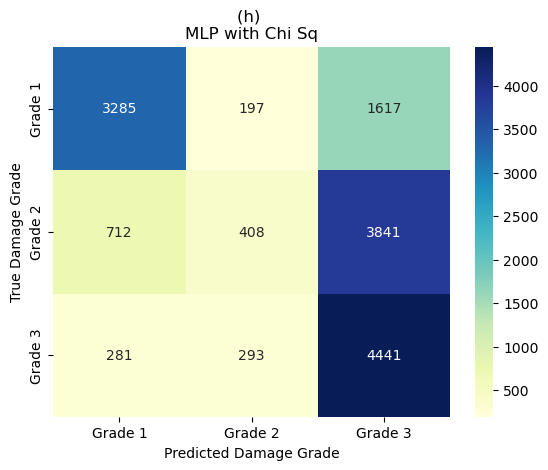

In [22]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("MLP with Chi Square FS Prediction Matrix")
plt.title("(h) \nMLP with Chi Sq")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()